In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import requests
# import sqlite3
# import mysql.connector as cnt
# import plotly.express as px

import requests
from bs4 import BeautifulSoup

import datetime as dt
print('Paskaita nr. 40, 2024-10-10')
print('Pasiruošta',dt.datetime.now())

Paskaita nr. 40, 2024-10-10
Pasiruošta 2024-10-10 23:31:13.813596


In [3]:
url = 'https://kauno.diena.lt/'
page = requests.get(url)
source = page.content
bs = BeautifulSoup(source,'html.parser')
# print(bs)
straipsniai=bs.find_all('div',{'class':'category-block-row grid-12 alpha omega unscore'})
# print(straipsniai)
for s in straipsniai:
    i=s.find('div',{'class':'articles-list-title-wrapper'})
    if i is not None:
        t=i.find('a',{'class':'articles-list-title'})
        print(t['href'])
        # print(t.text)

naujienos/kaunas/miesto-pulsas/v-matijosaitis-miestas-nesustojo-tik-paciu-kaunieciu-deka-1195275
naujienos/kaunas/miesto-pulsas/sirdi-glostanti-eile-kaunieciai-nori-speti-anksto-balsuoti-seimo-rinkimuose-1195301
naujienos/verslas/ekonomika/centromera-banko-salygos-ir-paslaugu-greitis-raktai-i-nekilnojamojo-turto-pirkeju-sprendimus-1195256
naujienos/kaunas/menas-ir-pramogos/kaune-seniausio-estijos-menininku-kolektyvo-paroda-1195201
naujienos/kaunas/nusikaltimai-ir-nelaimes/kaune-plesejo-ukinis-pastatas-vyras-apdege-veida-1195178
naujienos/kaunas/nusikaltimai-ir-nelaimes/veiksmas-partizanu-gatveje-pareigunai-sturmavo-automobili-sulaikytas-vyras-1194672
naujienos/verslas/ekonomika/darbdavio-magija-kas-darbuotoja-skatina-isitraukti-ir-augti-1182991
naujienos/lietuva/salies-pulsas/akibrokstas-privaciai-greitajai-pagalbai-viskas-vyksta-pagal-sutarti-1194484
naujienos/sveikata/psichologija/o-dabar-pakalbekime-apie-nieka-1194950
naujienos/sveikata/sveikata/vilniaus-rajone-uz-daugiau-nei-835-tu

In [4]:
url = "https://kauno.diena.lt/naujienos/kaunas/miesto-pulsas/v-matijosaitis-miestas-nesustojo-tik-paciu-kaunieciu-deka-1195275"
page = requests.get(url)
source = page.content
bs = BeautifulSoup(source,'html.parser')
straipsnis = bs.find_all('span',{'itemprop':'articleBody'})
# print(len(straipsnis))
print(straipsnis[0].text)

– Devyneri su puse metų – greitai minėsite dešimtmečio sukaktį. Dar užpernai pasiekėte rekordą, būdamas ilgiausiai dirbančiu Kauno meru per nepriklausomybės laikotarpį. Ką jums tai reiškia?
– Nesureikšminu tų skaičių ir rekordų, bet viena žinau, kad pats nebejaunėju. Gal dėl to ir norisi dar daug ką suspėti. Atrodo, nuveikta tikrai nemažai, bet kai pažiūriu, kiek visko priplanuota... Esu ramus, kad ateičiai nemažai projektų jau paruošta, kiti – rengimo stadijoje. Idėjų mūsų komandai niekada netrūko – reikia tik užtektinai finansų ir šiek tiek laiko joms įgyvendinti. Gal dar kokių dešimties metų (juokiasi)...
– Jūs šypsotės, bet daugelis išties norėtų sužinoti, kiek dar turite ambicijų tęsti darbus Kauno mero poste?
– Čia vienas dažnesnių klausimų, į kurį atsakymo pats sau neturiu. Tai niekada nebuvo mano asmeninė ambicija. Turėjau tik labai konkretų norą – sutvarkyti, pakeisti miestą. Pamenu, kažkada išvis galvojau neiti į šitas pareigas, po rinkimų 2015-aisiais domėjausi, kaip galėčia

In [5]:
# Surinkite visus straipsnių pavadinimus ir nuorodas į pačius straipsnius iš Kauno diena puslapio. 
# Suraskite vidutinį straipsnių pavadinimuose esančių žodžių skaičių.
# Atvaizduoikite grafiškai straipsnių kiekį VS žodžių kiekis pavadinime.

# Suraskite ilgiausią pavadinimą, nueikite į tą straipsnį.
# suraskite 5-kis dažniausiai pasikartojančius žodžius, iliustruokite grafiškai.

# Suskaičiuokite, kiek vidutiniškai turi žodžių straipsniai, esantys Kauno dienoje.

Straipsnių skaičius: 28
Vidutinis straipsnių pavadinimo žodžių skaičius: 8.893


<Axes: xlabel='Žodžių skaičius pavadinime', ylabel='Dažnis'>

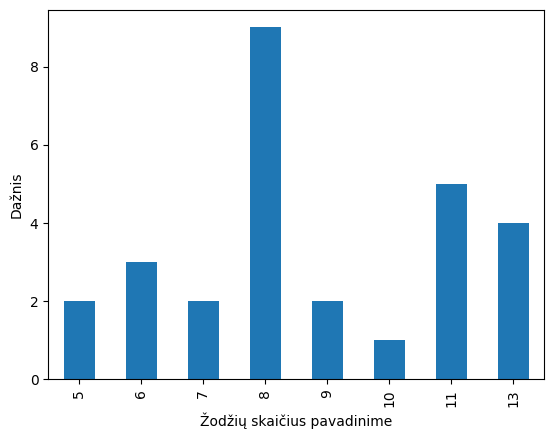

In [47]:
HomeUrl = 'https://kauno.diena.lt/'
page = requests.get(HomeUrl)
source = page.content
bs = BeautifulSoup(source,'html.parser')
# print(bs)
straipsniai=bs.find_all('div',{'class':'category-block-row grid-12 alpha omega unscore'})
# print(straipsniai)

urlLst=[]
žskLst=[]
pvdLst=[]
for s in straipsniai:
    i=s.find('div',{'class':'articles-list-title-wrapper'})
    if i is not None:
        t=i.find('a',{'class':'articles-list-title'})
        # print(t['href'])
        # print(t.text)
        urlElm=t['href'].split('/')
        if urlElm[0]=='naujienos':
            žodžiai=t.text.split()
            urlLst.append(HomeUrl+t['href'])
            žskLst.append(len(žodžiai))
            pvdLst.append(t.text)
            # print(urlElm)
            # print(len(žodžiai),žodžiai)

df = pd.DataFrame()
df['url']=urlLst # Straipsnio URL
df['žsk']=žskLst # Straipsnio pavadinimo žodžių skaičius
df['pvd']=pvdLst # Straipsnio pavadinimas
df['rsk']=df['pvd'].str.len() # Straipsnio pavadinimo raidžių skaičius

print('Straipsnių skaičius:',df['url'].size)
print('Vidutinis straipsnių pavadinimo žodžių skaičius:',df['žsk'].mean().round(3))

dfGroup=df.groupby('žsk').size()
dfGroup.plot(kind='bar',xlabel='Žodžių skaičius pavadinime',ylabel='Dažnis')

In [16]:
print('Straipsniai ilgiausiais pavadinimais\n')
print(df[['žsk','rsk','pvd']].sort_values('rsk',ascending=False).head(5))

Straipsniai ilgiausiais pavadinimais

    žsk  rsk                                                pvd
2    13   97  „Centromera“: banko sąlygos ir paslaugų greiti...
23   13   96  Dėl advokato mirties sukrėsti kolegos: norėtum...
12   13   94  Auskarų vėrimo meistrė G. Balevičė – apie grož...
9    13   93  Vilniaus rajone už daugiau nei 835 tūkst. eurų...
19   13   88  V. Zelenskis neigia kalbas, kad derybose su Eu...


Tiriame straipsnį ilgiausiu pavadinimu


<Axes: xlabel='Žodis', ylabel='Dažnis'>

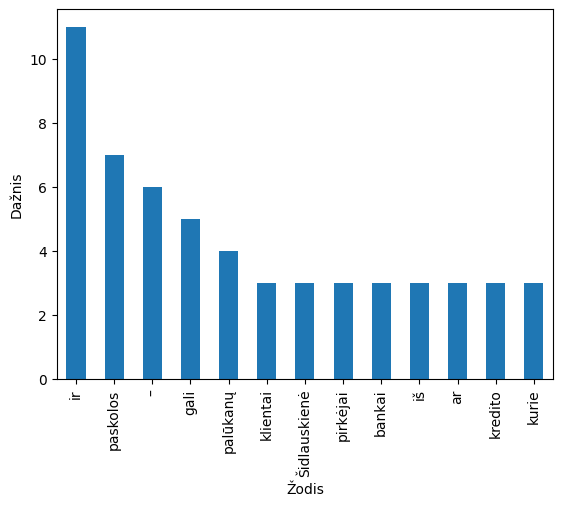

In [33]:
print('Tiriame straipsnį ilgiausiu pavadinimu')
m=df['rsk'].max()
url=df.query('rsk==@m')['url'].tolist()[0]
# print(url)

page = requests.get(url)
source = page.content
bs = BeautifulSoup(source,'html.parser')
straipsnis = bs.find_all('span',{'itemprop':'articleBody'})
# print(straipsnis[0].text)
žodžiai=straipsnis[0].text.split()
# print(žodžiai)
ždžDF = pd.DataFrame()
ždžDF['ždž']=žodžiai

dfGroup=ždžDF.groupby('ždž').size().sort_values(ascending=False).head(13)
dfGroup.plot(kind='bar',xlabel='Žodis',ylabel='Dažnis')

# print('Žodžių skaičius grafike:',dfGroup.size)

In [49]:
print('Kiek žodžių Kauno dienos straipsniuose')

HomeUrl = 'https://kauno.diena.lt/'
page = requests.get(HomeUrl)
source = page.content
bs = BeautifulSoup(source,'html.parser')
straipsniai=bs.find_all('div',{'class':'category-block-row grid-12 alpha omega unscore'})

nr=0
urlLst=[]
žskLst=[]
for s in straipsniai:
    i=s.find('div',{'class':'articles-list-title-wrapper'})
    if ( i is not None )and( nr<7 ):
        nr=nr+1
        t=i.find('a',{'class':'articles-list-title'})
        # print(t['href'])
        # print(t.text)
        urlElm=t['href'].split('/')
        if urlElm[0]=='naujienos':
            url=HomeUrl+t['href']
            urlLst.append(url)
            print(nr,url)
            page = requests.get(url)
            source = page.content
            bs = BeautifulSoup(source,'html.parser')
            straipsnis = bs.find_all('span',{'itemprop':'articleBody'})
            # print(straipsnis[0].text)
            žodžiai=straipsnis[0].text.split()
            # print(žodžiai)
            ždžDF = pd.DataFrame()
            ždžDF['ždž']=žodžiai

            # dfGroup=ždžDF.groupby('ždž').size().sort_values(ascending=False).head(13)
            # dfGroup.plot(kind='bar',xlabel='Žodis',ylabel='Dažnis')

            # print('Žodžių skaičius grafike:',dfGroup.size)

            # žskLst.append(len(žodžiai))
            # pvdLst.append(t.text)
            # žodžiai=t.text.split()
            # print(len(žodžiai),žodžiai)

# df = pd.DataFrame()
# df['url']=urlLst # Straipsnio URL
# df['žsk']=žskLst # Straipsnio pavadinimo žodžių skaičius
# df['pvd']=pvdLst # Straipsnio pavadinimas
# df['rsk']=df['pvd'].str.len() # Straipsnio pavadinimo raidžių skaičius

# print('Straipsnių skaičius:',df['url'].size)
# print('Vidutinis straipsnių pavadinimo žodžių skaičius:',df['žsk'].mean().round(3))

# dfGroup=df.groupby('žsk').size()
# dfGroup.plot(kind='bar',xlabel='Žodžių skaičius pavadinime',ylabel='Dažnis')

Kiek žodžių Kauno dienos straipsniuose
1 https://kauno.diena.lt/naujienos/kaunas/miesto-pulsas/v-matijosaitis-miestas-nesustojo-tik-paciu-kaunieciu-deka-1195275
2 https://kauno.diena.lt/naujienos/kaunas/miesto-pulsas/sirdi-glostanti-eile-kaunieciai-nori-speti-anksto-balsuoti-seimo-rinkimuose-1195301
3 https://kauno.diena.lt/naujienos/verslas/ekonomika/centromera-banko-salygos-ir-paslaugu-greitis-raktai-i-nekilnojamojo-turto-pirkeju-sprendimus-1195256
4 https://kauno.diena.lt/naujienos/kaunas/menas-ir-pramogos/kaune-seniausio-estijos-menininku-kolektyvo-paroda-1195201
5 https://kauno.diena.lt/naujienos/kaunas/nusikaltimai-ir-nelaimes/kaune-plesejo-ukinis-pastatas-vyras-apdege-veida-1195178
6 https://kauno.diena.lt/naujienos/kaunas/nusikaltimai-ir-nelaimes/veiksmas-partizanu-gatveje-pareigunai-sturmavo-automobili-sulaikytas-vyras-1194672
7 https://kauno.diena.lt/naujienos/verslas/ekonomika/darbdavio-magija-kas-darbuotoja-skatina-isitraukti-ir-augti-1182991
